In [1]:
# [1] COLLECT ALL GROUND TRUTH DATA
from parse_truth_ALL import main as parse_truth_all
import collections

datadir = '/home/kyle/data/rnaseq/mouse/'
froot = 'mouse'
show_flag = False

# Given list of gt filename-instancenum pairs, aggregate dictionary:
# key = 'filename instancenum'
# val = ground truth path decomp info (weights and paths)
gt_pathset_dict = parse_truth_all(datadir)

In [2]:
# [2] GET CATFISH INFO
from algorithm_output_parser import catfish_output_parser
catfish_results_file = '../catfish-comparison/catfish-log-' + froot + '.txt'
all_catfish_paths = catfish_output_parser(catfish_results_file, gt_pathset_dict, verbose=False)

In [3]:
# [3] GET TOBOGGAN INFO
from algorithm_output_parser import toboggan_output_parser
toboggan_results_file = './data/' + froot + '-master-file.txt'
all_toboggan_paths = toboggan_output_parser(toboggan_results_file, gt_pathset_dict, verbose=False)

In [4]:
# [4] COMPARE GROUND TRUTH VS ALGORITHM OUTPUT
from algorithm_output_parser import process_algorithm_output

In [5]:
# FILTER ALGORITHM OUTPUTS FOR RELEVANT DATA
# catfish_stats, catfish_identical, catfish_different = get_stats_for_algorithm(gt_pathset_dict, all_catfish_paths)
# toboggan_stats, toboggan_identical, toboggan_different = get_stats_for_algorithm(gt_pathset_dict, all_toboggan_paths)

all_stats = {}
indices_identical = {}
indices_different = {}
indices_timeout = {}

all_stats[0], indices_identical[0], indices_different[0], indices_timeout[0] = process_algorithm_output(gt_pathset_dict, all_catfish_paths)
all_stats[1], indices_identical[1], indices_different[1], indices_timeout[1] = process_algorithm_output(gt_pathset_dict, all_toboggan_paths)

Num timeouts = 0
Num timeouts = 2485


In [8]:
# [7] PLOT RATIO OF SUCCESS VS DECOMP SIZE
import numpy
import matplotlib.pyplot as plt
import collections
figurename = 'size-vs-ratio-identical-'

def plot_ratio_success(figurename, all_stats, indices_identical, indices_timeout, show_flag=True):
    plt.close()
    plt.clf()

    alg_names = ['catfish', 'toboggan']
    colors = ['red', 'blue']

    def get_width(num_datapoints):
        return 0.18*numpy.log10(num_datapoints)

    fig, ax1 = plt.subplots()
    fig_alg = {}
    max_label = 0

    for which_alg in all_stats:
        print(" {} with # data points {} ".format(alg_names[which_alg], len(all_stats[which_alg])) )
        # all_stats.append( [len(gt_pathset), len(catfish_pathset), this_jaccard_value, this_intersect, gap] )
        stats = all_stats[which_alg]
        inds_identical = indices_identical[which_alg]
        inds_timeouts = indices_timeout[which_alg]

        data1 = numpy.array(stats[:,0])  # size of ground truth pathset
        data2 = numpy.array(stats[inds_identical, 0])  # size of ground truth pathset when algorithm identical

        data1_counter = collections.Counter([ x[0] for x in data1 ])
        data2_counter = collections.Counter([ x[0] for x in data2 ])

        data1_counter = collections.Counter([ x[0] for x in data1 ])
        data2_counter = collections.Counter([ x[0] for x in data2 ])

        data = []
        soln_sizes = []
        num_datapoints = []
        widths = []
        for soln_size, x in data1_counter.items():
            y = data2_counter[soln_size]
            if x != 0:
                data.append(y/x)
                num_datapoints.append(int(x))
                soln_sizes.append(int(soln_size))
                widths.append(get_width(x))
                if y != 0:
                    max_label = max( max_label, int(soln_size) )

        ax1.scatter(soln_sizes, data, color=colors[which_alg], label=alg_names[which_alg], alpha=0.5)
        
    #     axis_font = {'fontname':'DejaVu Sans', 'size':'14'}
    #     title_font = {'fontname':'DejaVu Sans', 'size':'14'}
    #     xtick_font = {'fontname':'DejaVu Sans', 'size':'11'}
    #     ytick_font = {'fontname':'DejaVu Sans', 'size':'12'}


    #     if froot == 'human':
    #         plt.ylabel("Frequency", **axis_font)
    #         plt.gca().set_yticklabels([10**x for x in range(0, 6)], **ytick_font)
    #         plt.gca().set_yscale("log")
    #         plt.legend(loc='upper right', frameon=False)
    #     else:
    #         plt.gca().set_yticklabels([])

    #     plt.title("dataset: {}".format(froot), **title_font)
    #     plt.xlabel("time", **axis_font)
    #     plt.xlim([10**-4, 10**4])
    #     plt.ylim([10**0, 10**6])
    #     plt.gca().set_xticklabels([10**x for x in range(-4, 5)], **xtick_font)
    #     plt.gca().set_xscale("log")

    #     fig = plt.gcf()
    #     fig.tight_layout()
    
    
    
    plt.title("Algorithms, success on {}".format(froot))
    plt.xlabel("Ground truth decomposition size")
    ax1.set_ylabel("proportion of instances: output = GT", color='purple')
    ax1.set_ylim([0,1])
    ax1.tick_params('y', colors='purple')

    # get all ground truth sizes
    soln_sizes = [ (int(soln_size), int(count)) for soln_size, count in \
                  collections.Counter([ x[0] for x in \
                                       numpy.array(all_stats[0][:,0]) ]).items() if count != 0 ]         
    soln_sizes, num_datapoints = zip(*soln_sizes)

    plt.xticks( range(1, int(max(soln_sizes)+1)) )
    ax2 = ax1.twinx()
    ax2.bar(list(soln_sizes), list(num_datapoints), color='grey', alpha=0.33)
    ax2.set_ylabel('Num instances', color='grey')
    ax2.set_yscale("log")
    ax2.tick_params('y', colors='grey')

    ax1.legend(loc='upper right', frameon=False)#, handles=ax1, labels=alg_names)
    fig.tight_layout()

    if show_flag:
        plt.show()
    else:
        plt.savefig( './figures/' + ''.join([figurename, froot, '.eps']), format='eps', dpi=300)
        plt.savefig( './figures/' + ''.join([figurename, froot, '.png']), format='png', dpi=300)
    plt.close()
    print("Done with plot {}".format(figurename))

 catfish with # data points 473185 
 toboggan with # data points 473185 


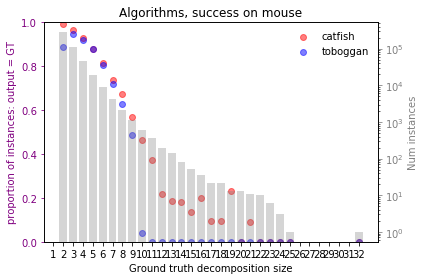

Done with plot size-vs-ratio-identical-


In [9]:
plot_ratio_success('size-vs-ratio-identical-', all_stats, indices_identical, indices_timeout)